# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving artists.dat to artists.dat
Saving tags.dat to tags.dat
Saving user_artists.dat to user_artists.dat
Saving user_friends.dat to user_friends.dat
Saving user_taggedartists.dat to user_taggedartists.dat
Saving user_taggedartists-timestamps.dat to user_taggedartists-timestamps.dat
User uploaded file "artists.dat" with length 1925879 bytes
User uploaded file "tags.dat" with length 234468 bytes
User uploaded file "user_artists.dat" with length 1296455 bytes
User uploaded file "user_friends.dat" with length 251565 bytes
User uploaded file "user_taggedartists.dat" with length 4366696 bytes
User uploaded file "user_taggedartists-timestamps.dat" with length 5249917 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
artist_data = pd.read_csv("artists.dat", sep="\t")
artist_data

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
...,...,...,...,...
17627,18741,Diamanda Galás,http://www.last.fm/music/Diamanda+Gal%C3%A1s,http://userserve-ak.last.fm/serve/252/16352971...
17628,18742,Aya RL,http://www.last.fm/music/Aya+RL,http://userserve-ak.last.fm/serve/252/207445.jpg
17629,18743,Coptic Rain,http://www.last.fm/music/Coptic+Rain,http://userserve-ak.last.fm/serve/252/344868.jpg
17630,18744,Oz Alchemist,http://www.last.fm/music/Oz+Alchemist,http://userserve-ak.last.fm/serve/252/29297695...


In [ ]:
user_artist_plays = pd.read_csv("user_artists.dat", sep="\t")
user_artist_plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [ ]:
user_taggedartists = pd.read_csv('user_taggedartists.dat', sep='\t',  encoding='latin-1')
user_taggedartists

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
...,...,...,...,...,...,...
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010


In [ ]:
tags = pd.read_csv('tags.dat', sep='\t',  encoding='latin-1')
tags.tagID.value_counts()

2047     1
7497     1
9558     1
3411     1
1362     1
        ..
10896    1
4751     1
6798     1
653      1
2049     1
Name: tagID, Length: 11946, dtype: int64

## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando, quienes estén realizando la materia completa, deberán realizar ambas partes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

## Información de los datasets

In [ ]:
display(artist_data.info())
display(artist_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17632 non-null  int64 
 1   name        17632 non-null  object
 2   url         17632 non-null  object
 3   pictureURL  17188 non-null  object
dtypes: int64(1), object(3)
memory usage: 551.1+ KB


None

,id
count,17632.000000
mean,9156.636853
std,5392.515296
min,1.000000
25%,4501.750000
50%,9048.500000
75%,13769.250000
max,18745.000000


In [ ]:
display(user_artist_plays.info())
display(user_artist_plays.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92834 entries, 0 to 92833
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    92834 non-null  int64
 1   artistID  92834 non-null  int64
 2   weight    92834 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


None

,userID,artistID,weight
count,92834.000000,92834.000000,92834.00000
mean,1037.010481,3331.123145,745.24393
std,610.870436,4383.590502,3751.32208
min,2.000000,1.000000,1.00000
25%,502.000000,436.000000,107.00000
50%,1029.000000,1246.000000,260.00000
75%,1568.000000,4350.000000,614.00000
max,2100.000000,18745.000000,352698.00000


In [ ]:
display(tags.info())
display(tags.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11946 entries, 0 to 11945
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tagID     11946 non-null  int64 
 1   tagValue  11946 non-null  object
dtypes: int64(1), object(1)
memory usage: 186.8+ KB


None

,tagID
count,11946.000000
mean,6242.315336
std,3667.498057
min,1.000000
25%,3036.250000
50%,6210.500000
75%,9460.750000
max,12648.000000


In [ ]:
display(user_taggedartists.info())
display(user_taggedartists.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186479 entries, 0 to 186478
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   userID    186479 non-null  int64
 1   artistID  186479 non-null  int64
 2   tagID     186479 non-null  int64
 3   day       186479 non-null  int64
 4   month     186479 non-null  int64
 5   year      186479 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


None

,userID,artistID,tagID,day,month,year
count,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000
mean,1035.600137,4375.845328,1439.582913,1.095566,6.524215,2008.809791
std,622.461272,4897.789595,2775.340279,0.712813,3.486855,1.410062
min,2.000000,1.000000,1.000000,1.000000,1.000000,1956.000000
25%,488.000000,686.000000,79.000000,1.000000,3.000000,2008.000000
50%,1021.000000,2203.000000,195.000000,1.000000,7.000000,2009.000000
75%,1624.000000,6714.000000,887.000000,1.000000,10.000000,2010.000000
max,2100.000000,18744.000000,12647.000000,9.000000,12.000000,2011.000000


## Artistas más escuchados

In [ ]:
# Mergeamos ambos dataframes 
artist_data.rename(columns={'id':'artistID'}, inplace=True)
data = pd.merge(artist_data[['name', 'artistID']], user_artist_plays, on='artistID')
data

,name,artistID,userID,weight
0,MALICE MIZER,1,34,212
1,MALICE MIZER,1,274,483
2,MALICE MIZER,1,785,76
3,Diary of Dreams,2,135,1021
4,Diary of Dreams,2,257,152
...,...,...,...,...
92829,Diamanda Galás,18741,454,301
92830,Aya RL,18742,454,294
92831,Coptic Rain,18743,454,287
92832,Oz Alchemist,18744,454,286


In [ ]:
ten_most_popular_artists = data[['artistID','name', 'weight']].groupby('name').sum().sort_values('weight', ascending=False).head(10)
ten_most_popular_artists

,artistID,weight
name,,
Britney Spears,150858,2393140
Depeche Mode,20304,1301308
Lady Gaga,54379,1291387
Christina Aguilera,118844,1058405
Paramore,198702,963449
Madonna,28743,921198
Rihanna,139392,905423
Shakira,223619,688529
The Beatles,108960,662116


#### Considerando a 'weights' como las reproducciones que cada usuario le dio a cada artista, los 10 artistas más escuchados son:
    - Britney Spears	    2393140
    - Depeche Mode	        1301308
    - Lady Gaga	            1291387
    - Christina Aguilera    1058405
    - Paramore	            963449
    - Madonna	            921198
    - Rihanna	            905423
    - Shakira	            688529
    - The Beatles	        662116
    - Katy Perry           532545

## Distribución de reproducciones por usuario

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
data_users = data[['userID', 'weight']].groupby('userID').sum().sort_values('weight', ascending=False).head(50)

In [ ]:
data_users.reset_index(inplace=True)
# data_users.drop(column='index', inplace=True)
data_users.sort_values('weight', ascending=False, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


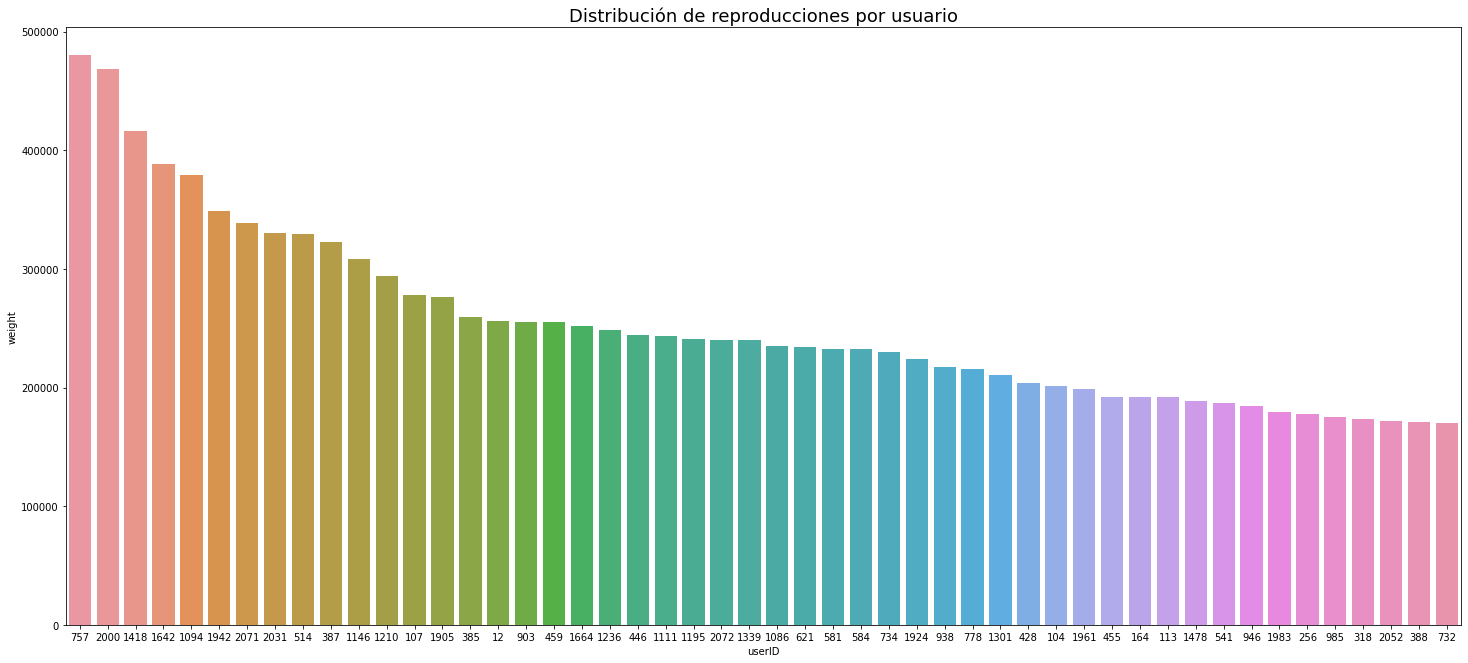

In [ ]:
fig, ax = plt.subplots(figsize=(25,11))
plt.title("Distribución de reproducciones por usuario", size=18)
sns.barplot('userID', 'weight', data=data_users, order=data_users.sort_values('weight', ascending=False).userID)

## Géneros más escuchados

In [ ]:
tag_count = user_taggedartists.groupby('tagID').count().sort_values('userID', ascending=False).head(10)
tag_count.reset_index(inplace=True)
tag_count

,tagID,userID,artistID,day,month,year
0,73,7503,7503,7503,7503,7503
1,24,5418,5418,5418,5418,5418
2,79,5251,5251,5251,5251,5251
3,18,4672,4672,4672,4672,4672
4,81,4458,4458,4458,4458,4458
5,130,4228,4228,4228,4228,4228
6,25,2791,2791,2791,2791,2791
7,39,2739,2739,2739,2739,2739
8,78,2631,2631,2631,2631,2631
9,192,2287,2287,2287,2287,2287


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


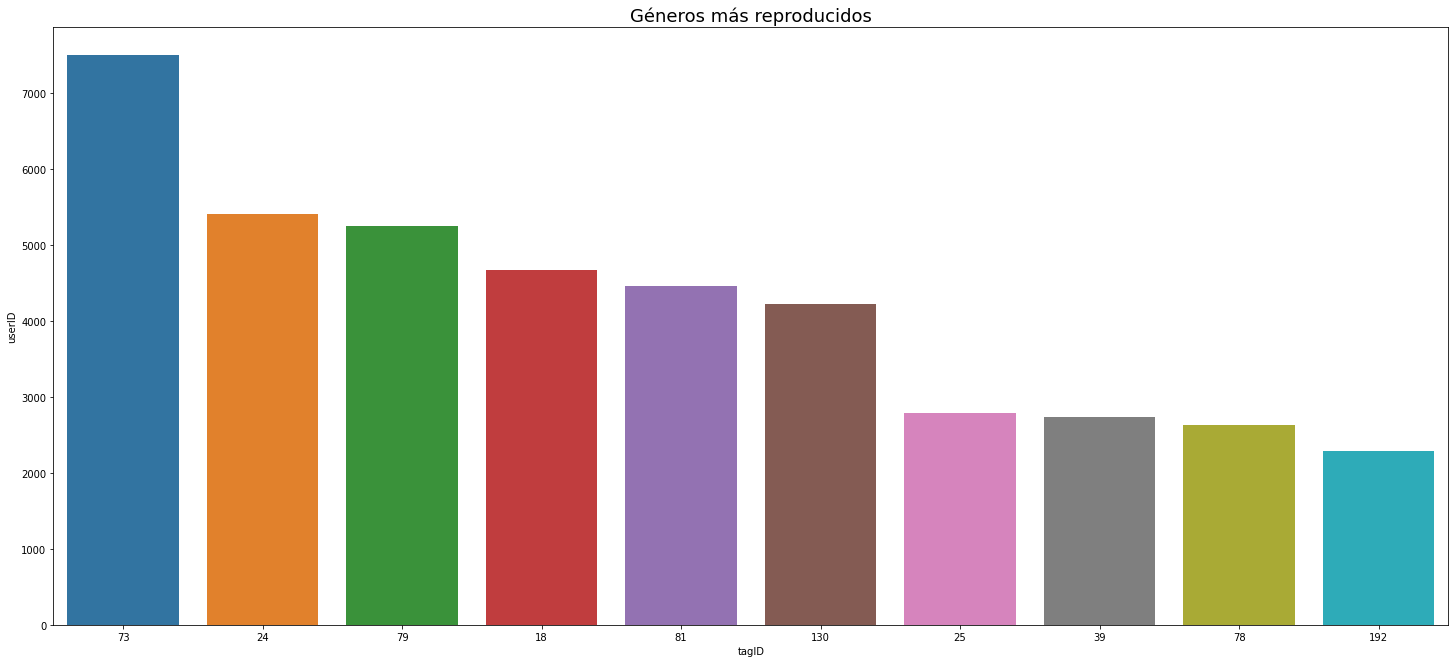

In [ ]:
fig, ax = plt.subplots(figsize=(25,11))
plt.title("Géneros más reproducidos", size=18)
sns.barplot('tagID', 'userID', data=tag_count, order=tag_count.sort_values('userID', ascending=False).tagID)

#Ejercicio 2a - Filtrados Colaborativos

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

Esta parte del ejercicio es obligatoria para aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa deerán realizar también el [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). 

Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

### Instalaciones necesarias e imports...

In [ ]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 10.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618269 sha256=86e7d485a58a0748afd1580ac5e9159b3624f705bf0e1f733b542a6778cb5aa7
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

### Subida de archivos necesarios...

## Actividad 2.a

###1-Desarrollo de la matriz Usuario - Contenido

In [ ]:
user_artist_data = pd.read_csv("user_artists.dat", sep="\t")
user_artist_data.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [ ]:
artist_data = pd.read_csv("artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [ ]:
# Import surprise modules
from surprise import Dataset
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.accuracy import rmse
from surprise import SVD, SVDpp, NMF, SlopeOne, CoClustering, KNNBaseline, KNNWithZScore, KNNWithMeans, KNNBasic, BaselineOnly, NormalPredictor
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [ ]:
users = list(user_artist_data['userID'].unique())
artist = list(user_artist_data['artistID'].unique())
weight = list(user_artist_data['weight'].unique())

In [ ]:
weight_max = user_artist_data['weight'].max()
weight_max

weight_normal = user_artist_data['weight'].apply(lambda x: x/weight_max)
weight_normal

user_artist_data['weight'] = weight_normal
user_artist_data['weight']

0        0.039362
1        0.033145
2        0.032183
3        0.029203
4        0.025469
           ...   
92829    0.000955
92830    0.000842
92831    0.000797
92832    0.000794
92833    0.000746
Name: weight, Length: 92834, dtype: float64

###2.Entrenamiento del algoritmo de recomendación:

In [ ]:
def artist_id_to_name(id):
    return artist_data.loc[artist_data['id']==id].name

def artist_id_list_to_names(ids):
  result = []
  for id in ids:
    result.append(artist_data.loc[artist_data['id']==id].name)
  
  return result;

result = artist_id_list_to_names([1,2,3,4,5])
result

[0    MALICE MIZER
 Name: name, dtype: object, 1    Diary of Dreams
 Name: name, dtype: object, 2    Carpathian Forest
 Name: name, dtype: object, 3    Moi dix Mois
 Name: name, dtype: object, 4    Bella Morte
 Name: name, dtype: object]

In [ ]:
# Specific reader for surpirse to work.
reader = Reader(rating_scale= (user_artist_data['weight'].unique().min(),user_artist_data['weight'].unique().max()))
ratings = Dataset.load_from_df(user_artist_data, reader=reader)

In [ ]:
def train_test_model(model, ratings_train, ratings_test):
  model.fit(ratings_train)
  model.test(ratings_test)
  predictions = model.test(ratings_test)
  return rmse(predictions, verbose=False)

####Algoritmo de Recomendacion: KNNBasic - KNNWithMeans - KNNWithZScore

In [ ]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)
knn_b_model_rmse = train_test_model(KNNBasic(k=5, verbose=False),ratings_train, ratings_test)
knn_m_model_rmse = train_test_model(KNNWithMeans(k=5, verbose=False),ratings_train, ratings_test)
knn_z_model_rmse = train_test_model(KNNWithZScore(k=5, verbose=False),ratings_train, ratings_test)

print("KNN Basic RMSE on test: {:.4f}".format(knn_b_model_rmse))
print("KNN With Means RMSE on test: {:.4f}".format(knn_m_model_rmse))
print("KNN With Z Score RMSE on test: {:.4f}".format(knn_z_model_rmse))



KNN Basic RMSE on test: 0.0131
KNN With Means RMSE on test: 0.0129
KNN With Z Score RMSE on test: 0.0130


In [ ]:
model = KNNWithMeans(k=3, verbose=False)
cross_validate_metrics = cross_validate(model, ratings, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0104  0.0109  0.0139  0.0117  0.0015  
MAE (testset)     0.0024  0.0024  0.0023  0.0023  0.0000  
Fit time          0.33    0.33    0.36    0.34    0.01    
Test time         1.54    1.42    1.58    1.51    0.06    


In [ ]:
#First parameter: User ID. Second parameter: ArtistID
model.predict(2,53)

Prediction(uid=2, iid=53, r_ui=None, est=0.009434080597850327, details={'actual_k': 3, 'was_impossible': False})

###3.Sistema de recomendación

In [ ]:
artist_id = 255
print(artist_id_to_name(artist_id))
artist_id_list_to_names(model.get_neighbors(artist_id, 10))

249    Nach
Name: name, dtype: object


[270    Gang Starr
 Name: name, dtype: object, 1775    Бумбокс
 Name: name, dtype: object, 1132    Aina Sandoval
 Name: name, dtype: object, 154    אביב גפן
 Name: name, dtype: object, 1205    Nile
 Name: name, dtype: object, 1642    Cascadura
 Name: name, dtype: object, 1852    Heaven Shall Burn
 Name: name, dtype: object, 1245    Mayhem
 Name: name, dtype: object, 1383    Lady Sovereign
 Name: name, dtype: object, 1842    Richard Wagner
 Name: name, dtype: object]

In [ ]:
from scipy.sparse import csr_matrix

M = user_artist_data['userID'].nunique()
N = user_artist_data["artistID"].nunique()

user_mapper = dict(zip(np.unique(user_artist_data["userID"]), list(range(M))))
artist_mapper = dict(zip(np.unique(user_artist_data["artistID"]), list(range(N))))
artist_inv_mapper = dict(zip(list(range(N)), np.unique(user_artist_data["artistID"])))


user_index = [user_mapper[i] for i in user_artist_data['userID']]
item_index = [artist_mapper[i] for i in user_artist_data['artistID']]

X = csr_matrix((user_artist_data['weight'], (user_index,item_index)), shape=(M,N))

n_weights_per_artist = X.getnnz(axis=0)
sum_weights_per_artist = X.sum(axis=0)
mean_weight_per_artist = sum_weights_per_artist/n_weights_per_artist
X_mean_artist = np.tile(mean_weight_per_artist, (X.shape[0],1))
X_norm = X - csr_matrix(X_mean_artist)

In [ ]:
### NO LA VAMOS A USAR POR AHORA. OPTAMOS POR get_neighbors DE SURPR!SE 

from sklearn.neighbors import NearestNeighbors

def find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):

    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the artistId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
artist_id = 289
similar_artists = find_similar_artists(artist_id,X_norm , artist_mapper, artist_inv_mapper, k=10)
similar_artists

[523, 318, 349, 466, 972, 2094, 911, 2025, 293]

In [ ]:
artist_name = artist_id_to_name(artist_id)
artist_name

283    Britney Spears
Name: name, dtype: object

In [ ]:
print(f"Because you listened {artist_name}:")
for i in similar_artists:
    print(artist_id_to_name(i))

Because you listened 283    Britney Spears
Name: name, dtype: object:
517    Lindsay Lohan
Name: name, dtype: object
312    Hilary Duff
Name: name, dtype: object
343    The Pussycat Dolls
Name: name, dtype: object
460    Ke$ha
Name: name, dtype: object
963    t.A.T.u.
Name: name, dtype: object
2079    BoA
Name: name, dtype: object
902    Rachel Stevens
Name: name, dtype: object
2010    Simon Curtis
Name: name, dtype: object
287    Ashlee Simpson
Name: name, dtype: object


# Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

###Evaluación sobre cold start

Tomamos 10 id de artistas random mediante: artist_data.sample(10)

El resultado:

options = [15072, 11127, 12703, 8491, 4577, 11939, 9529, 10358, 13964, 16727]

In [ ]:
options = [289, 72, 89, 292, 498, 67, 288, 701, 227, 300] 
artist_data_reduce = artist_data[~artist_data.id.isin(options)]
artist_data_reduce.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [ ]:
#Se verifica que el primer id haya sido extraído
artist_data_reduce[artist_data_reduce['id']==15072]

,id,name,url,pictureURL
14368,15072,The Brothers Gutworm,http://www.last.fm/music/The+Brothers+Gutworm,http://userserve-ak.last.fm/serve/252/57783955...


In [ ]:
user_artist_data_reduce = user_artist_data[~user_artist_data.artistID.isin(options)]

In [ ]:
user_artist_data_reduce

,userID,artistID,weight
0,2,51,0.039362
1,2,52,0.033145
2,2,53,0.032183
3,2,54,0.029203
4,2,55,0.025469
...,...,...,...
92829,2100,18726,0.000955
92830,2100,18727,0.000842
92831,2100,18728,0.000797
92832,2100,18729,0.000794


In [ ]:
user_taggedartists_data = pd.read_csv("user_taggedartists.dat", sep="\t")
user_taggedartists_data_reduce = user_taggedartists_data[~user_taggedartists_data.artistID.isin(options)]
user_taggedartists_data_reduce.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [ ]:
user_taggedartists_data_reduce[user_taggedartists_data_reduce['artistID']==15072]

,userID,artistID,tagID,day,month,year
131156,1503,15072,18,1,1,2011
131157,1503,15072,24,1,1,2011
131158,1503,15072,9682,1,1,2011


In [ ]:
tags_data = pd.read_csv("tags.dat", sep="\t", encoding='ISO-8859-1')
tags_data.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [ ]:
user_artist_tag_data = pd.merge(tags_data, user_taggedartists_data_reduce, on=["tagID"])
user_artist_tag_data

,tagID,tagValue,userID,artistID,day,month,year
0,1,metal,4,918,1,5,2008
1,1,metal,12,181,1,5,2010
2,1,metal,12,198,1,2,2010
3,1,metal,12,500,1,2,2010
4,1,metal,12,503,1,3,2010
...,...,...,...,...,...,...,...
180222,12647,eire,2096,166,1,8,2010
180223,12647,eire,2096,389,1,9,2010
180224,12647,eire,2096,511,1,8,2010
180225,12647,eire,2096,1375,1,8,2010


In [ ]:

user_artist_tag_data.artistID.nunique()

12513

In [ ]:
artist_data.rename(columns={'id': 'artistID'}, inplace=True)
user_artist_tag_data = pd.merge(user_artist_tag_data, artist_data, how='inner', on=["artistID"])

In [ ]:
user_artist_tag_data.artistID.nunique()

12123

In [ ]:
user_artist_tag_data

,tagID,tagValue,userID,artistID,day,month,year,name,url,pictureURL
0,1,metal,4,918,1,5,2008,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
1,1,metal,170,918,1,11,2008,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
2,1,metal,313,918,1,5,2007,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
3,1,metal,491,918,1,2,2009,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
4,1,metal,595,918,1,8,2005,Megadeth,http://www.last.fm/music/Megadeth,http://userserve-ak.last.fm/serve/252/8129787.jpg
...,...,...,...,...,...,...,...,...,...,...
178684,12641,derd,2095,18669,1,11,2008,Kızılırmak,http://www.last.fm/music/K%C4%B1z%C4%B1l%C4%B1...,http://userserve-ak.last.fm/serve/252/40266747...
178685,12640,devrim,2095,18678,1,12,2008,ibrahim paşalı,http://www.last.fm/music/ibrahim+pa%C5%9Fal%C4%B1,http://userserve-ak.last.fm/serve/252/18799329...
178686,12640,devrim,2095,18689,1,11,2008,Yalçın Gül,http://www.last.fm/music/Yal%C3%A7%C4%B1n+G%C3...,http://userserve-ak.last.fm/serve/252/17023337...
178687,12640,devrim,2095,18695,1,12,2008,Carlos Puebla,http://www.last.fm/music/Carlos+Puebla,http://userserve-ak.last.fm/serve/252/521276.jpg


In [ ]:
user_artist_data_reduce.dtypes

userID        int64
artistID      int64
weight      float64
dtype: object

In [ ]:
user_artist_tag_data = pd.merge(user_artist_data_reduce, user_artist_tag_data, on=["artistID","userID"])

In [ ]:
user_artist_tag_data.artistID.nunique()

6844

### Generación de vectores de contenido

2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).

In [ ]:
user_artists_weights = user_artist_tag_data.groupby(['userID','name'])['weight'].sum().reset_index()

In [ ]:
user_artists_weights 

,userID,name,weight
0,2,Café Del Mar,0.058611
1,2,Enigma,0.042359
2,2,Fleetwood Mac,0.007610
3,2,Ministry of Sound,0.031143
4,2,Morcheeba,0.165723
...,...,...,...
19503,2100,Amžius,0.007372
19504,2100,Les Discrets,0.006280
19505,2100,Lifelover,0.006218
19506,2100,Tenhi,0.003011


In [ ]:
artist_tag_weights= user_artist_tag_data.groupby(['artistID','tagValue'])['weight'].sum().reset_index()
artist_tag_weights

,artistID,tagValue,weight
0,1,better than lady gaga,0.000215
1,1,jrock,0.001369
2,2,darkwave,0.013879
3,2,german,0.010284
4,2,gothic,0.011497
...,...,...,...
49236,18744,electronica,0.000811
49237,18744,low tempo,0.000811
49238,18744,nu jazz,0.000811
49239,18744,trip beat,0.000811


In [ ]:
artist_name_weights= user_artist_tag_data.groupby(['artistID','name'])['weight'].sum().reset_index()
artist_name_weights

,artistID,name,weight
0,1,MALICE MIZER,0.001585
1,2,Diary of Dreams,0.036116
2,3,Carpathian Forest,0.000525
3,4,Moi dix Mois,0.003187
4,5,Bella Morte,0.002212
...,...,...,...
6839,18734,The Young Gods,0.005852
6840,18735,Wiseblood,0.002538
6841,18736,LOSTFREEQ,0.112150
6842,18737,Ciccone Youth,0.004763


In [ ]:
artist_ids = artist_name_weights['artistID'].values

In [ ]:
artist_tags_listed = artist_tag_weights.copy()
tag_list = list()
for id_ in artist_ids:
  tag_list_temp = list()
  tag_list_temp = artist_tag_weights[artist_tag_weights['artistID']==id_].tagValue.values
  tag_list.append(tag_list_temp)
  
artist_name_weights['tags_list'] = tag_list

In [ ]:
artist_name_weights.drop(columns=['weight'], inplace=True)
artist_name_weights

,artistID,name,tags_list
0,1,MALICE MIZER,"[better than lady gaga, jrock]"
1,2,Diary of Dreams,"[darkwave, german, gothic, gothic rock]"
2,3,Carpathian Forest,"[black metal, norsk arysk metal, norwegian bla..."
3,4,Moi dix Mois,"[j-rock, visual kei]"
4,5,Bella Morte,"[darkwave, gothic, gothic rock]"
...,...,...,...
6839,18734,The Young Gods,"[alternative, electronica]"
6840,18735,Wiseblood,[alternative]
6841,18736,LOSTFREEQ,"[-pearl fashion music, ambient, aphex twin, at..."
6842,18737,Ciccone Youth,"[alternative, electronica, trip beat]"


### Sistema de Recomendacion

3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class GenresBasedFilter(object):
    def __init__(self, artist_name_weights, k=5):
        self.artist_to_idx = {row["name"]: idx for idx, row in artist_name_weights.iterrows()}
        self.idx_to_artist = {idx: artist for artist, idx in self.artist_to_idx.items()}
        self.k = k

        tagres = set(g for G in artist_name_weights['tags_list'] for g in G)
        for g in tagres:
            artist_name_weights[g] = artist_name_weights.tags_list.transform(lambda x: int(g in x))

        self.artist_tagres = artist_name_weights.drop(columns=['artistID', 'name', 'tags_list'])

    def fit(self, usr_ratings):
        self.artist_cosine_sim_ = cosine_similarity(self.artist_tagres, self.artist_tagres)

        self.user_ratings_ = {}
        for (userID, name, weight_rank) in usr_ratings.build_testset():
            if userID not in self.user_ratings_:
                self.user_ratings_[userID] = {}
            self.user_ratings_[userID][name] = weight_rank

        return self

    def predict(self, userID, artist):
        if not userID in self.user_ratings_ or not artist in self.artist_to_idx:
            global_mean = np.mean([
                usr_ratings for artist in self.user_ratings_.values() for usr_ratings in artist.values()
            ])
            return global_mean

        artist_idx = self.artist_to_idx[artist]
        sim_scores = list(enumerate(self.artist_cosine_sim_[artist_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:]

        sims = []

        for artist, score in sim_scores:
            if self.idx_to_artist[artist] in self.user_ratings_[userID]:
                sims.append((self.user_ratings_[userID][self.idx_to_artist[artist]], score))
                if len(sims) >= self.k:
                    break

        user_mean = np.mean(list(self.user_ratings_[userID].values()))

        pred = 0
        sim_sum = 0

        for rating, score in sims:
            pred += score * (rating - user_mean)
            sim_sum += score

        if sim_sum == 0:
            return user_mean

        return user_mean + pred / sim_sum

In [ ]:
cb_model = GenresBasedFilter(artist_name_weights).fit(ratings_train)

In [ ]:
test_model = KNNBaseline()
test_model.fit(ratings_train)
predictions = test_model.test(ratings_test)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
from tqdm import tqdm_notebook

transformed_ratings_train = []

for u, m, r in tqdm_notebook(ratings_train.build_testset()):
    transformed_ratings_train.append({
        "userID": u,
        "artistID": m,
        "cb_rating": cb_model.predict(u, m),
        "cf_rating": test_model.predict(u, m).est,
        "weight": r
    })

transformed_ratings_train = pd.DataFrame(transformed_ratings_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
transformed_ratings_train.head(5)

,userID,artistID,cb_rating,cf_rating,weight
0,990,6762,0.002093,0.001892,0.000729
1,990,3112,0.002093,0.001536,0.001559
2,990,620,0.002093,0.001794,0.001267
3,990,1151,0.002093,0.001430,0.000740
4,990,1709,0.002093,0.001623,0.001902


In [ ]:
artist_data.loc[artist_data['artistID']==1943].name

1928    Flying Lotus
Name: name, dtype: object

In [ ]:
transformed_ratings_train.shape

(74267, 5)

In [ ]:
#Funciones Atributos

from collections import defaultdict

user_mean_rating = defaultdict(
    lambda: transformed_ratings_train["weight"].sum(),
    transformed_ratings_train.groupby("userID")["weight"].sum().to_dict()
)
user_num_rating = defaultdict(
    lambda: 0,
    transformed_ratings_train.groupby("userID").size().to_dict()
)

def feature_function_constant():
    return 1

def feature_function_mean(user_id): # Media de rating que devuelve el usuario
    return user_mean_rating[user_id]

def feature_function_over(user_id, min_ratings=3): # Si el usuario puntuo más de 3 ratings
    return int(user_num_rating[user_id] >= min_ratings)

In [ ]:
for base_model in ["cb", "cf"]:
    transformed_ratings_train["{}_rating_fc".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_train["{}_rating_fm".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_train["{}_rating_fo".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )

## Evaluación del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

fwls_model = LinearRegression()

feature_cols = ["{}_rating_{}".format(fm, ff) for fm in ["cb", "cf"] for ff in ["fc", "fo", "fm"]]

fwls_model.fit(
    transformed_ratings_train[feature_cols],
    transformed_ratings_train["weight"]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Paso 5: Evaluamos el modelo.
# A - Cargamos los datos con el conjunto de test.
transformed_ratings_test = []

for u, m, r in tqdm_notebook(ratings_test):
    transformed_ratings_test.append({
        "userID": u,
        "movieId": m,
        "cb_rating": cb_model.predict(u, m),
        "cf_rating": test_model.predict(u, m).est,
        "weight": r
    })

transformed_ratings_test = pd.DataFrame(transformed_ratings_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
for base_model in ["cb", "cf"]:
    transformed_ratings_test["{}_rating_fc".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_test["{}_rating_fm".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_test["{}_rating_fo".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )

transformed_ratings_test["fwls_rating"] = fwls_model.predict(transformed_ratings_test[feature_cols])

In [ ]:
transformed_ratings_test.head(5)

,userID,movieId,cb_rating,cf_rating,weight,cb_rating_fc,cb_rating_fm,cb_rating_fo,cf_rating_fc,cf_rating_fm,cf_rating_fo,fwls_rating
0,1454,182,0.002093,0.001681,0.000973,0.002093,0.000206,0.002093,0.001681,1.656690e-04,0.001681,0.000826
1,714,862,0.002093,0.000438,0.000232,0.002093,0.000027,0.002093,0.000438,5.732123e-06,0.000438,0.001637
2,714,3432,0.002093,0.001733,0.000278,0.002093,0.000027,0.002093,0.001733,2.268242e-05,0.001733,0.003872
3,1594,8710,0.002093,0.002531,0.002739,0.002093,0.000243,0.002093,0.002531,2.934477e-04,0.002531,0.001978
4,365,6166,0.002093,0.000583,0.000026,0.002093,0.000003,0.002093,0.000583,8.565108e-07,0.000583,0.002331


In [ ]:
from sklearn.metrics import mean_squared_error

for model in ["cf", "cb", "fwls"]:
    rmse = np.sqrt(
        mean_squared_error(
            transformed_ratings_test["weight"],
            transformed_ratings_test["{}_rating".format(model)]
        )
    )
    
    print("RMSE for {} model: {:03f}".format(model, rmse))

RMSE for cf model: 0.012232
RMSE for cb model: 0.012363
RMSE for fwls model: 0.040036


In [ ]:

# avg ratings and rating counts
avg_rating = transformed_ratings_test.groupby("movieId")["fwls_rating"].mean()
num_ratings = transformed_ratings_test.groupby("movieId")["fwls_rating"].count()
# getting counts and average ratings
fwls_ratings_counts = pd.DataFrame({"avg_rating": avg_rating,
                               "num_of_ratings": num_ratings})
# joining the new values to movie data
full_artist_data_fwls = pd.merge(transformed_ratings_test, fwls_ratings_counts, left_on="movieId", right_index=True)

In [ ]:
full_artist_data_fwls = full_artist_data_fwls.rename(columns = {'movieId': 'artistID'}, inplace = False)
transformed_ratings_test = transformed_ratings_test.rename(columns = {'movieId': 'artistID'}, inplace = False)
artist_pivot_fwls = transformed_ratings_test.pivot_table(index='userID', 
                            columns='artistID', values='fwls_rating').fillna(0)

In [ ]:
artist_group = pd.merge(artist_data, user_artist_plays, on=["artistID"]).groupby(['artistID','name'])['weight'].sum().reset_index()
art_most_listened = art_agr.sort_values(by='weight', ascending=False).head(10)
art_most_listened

,artistID,name,weight
283,289,Britney Spears,2393140
66,72,Depeche Mode,1301308
83,89,Lady Gaga,1291387
286,292,Christina Aguilera,1058405
492,498,Paramore,963449
61,67,Madonna,921198
282,288,Rihanna,905423
695,701,Shakira,688529
221,227,The Beatles,662116
294,300,Katy Perry,532545


In [ ]:
def get_similar_artist(full_artist_data: pd.DataFrame,
                       artist_matrix: pd.DataFrame,
                       artist_id: int,
                       min_num_of_ratings: int = 10,
                       n_recommendations: int = 10
                       ):
    """
    Get similar artist based on correlation with other artist 
    """
    if len(full_artist_data[full_artist_data.artistID==artist_id])>0:
        # get most correlated artist
        similar_artist = artist_matrix.corrwith(artist_matrix[artist_id])
        # converting to a dataframe and dropping NaN's
        similar_corr_df = pd.DataFrame({"correlation":similar_artist})
        similar_corr_df.dropna(inplace=True)

        # store the oringinal dataframe
        orig = full_artist_data.copy()

        # merge with correlated dataframe but only keep specified columns
        corr_with_artist = pd.merge(left=similar_corr_df,
                                   right=orig, 
                                   on="artistID")[
            ["artistID", "correlation", "avg_rating", "num_of_ratings"]].drop_duplicates().reset_index(drop=True)

        # filter artist with less than min_num_of_ratings
        result = corr_with_artist[corr_with_artist['num_of_ratings'] > min_num_of_ratings].sort_values(
                                                                                         by='correlation',
                                                                                         ascending=False)
        return result.iloc[1:, :].head(n_recommendations)
    else:
        return art_most_listened.iloc[1:,:].head(n_recommendations)

In [ ]:
# test function on deleted ids - 6054: BEATLES
result = get_similar_artist(full_artist_data_fwls, artist_pivot_fwls, 6054, n_recommendations = 10 )
result

,artistID,correlation,avg_rating,num_of_ratings
1018,1400,0.300476,0.002547,29
999,1376,0.259948,0.002035,14
157,225,0.259718,0.002202,24
309,423,0.216134,0.002856,19
164,233,0.199486,0.003649,26
124,190,0.048254,0.004225,70
141,207,0.046205,0.004495,50
593,797,0.000089,-0.000039,12
1494,2137,-0.000136,0.000060,11
234,320,-0.000300,0.000241,25


In [ ]:
# Artists related info
artist_data[artist_data.artistID.isin(result.artistID.tolist())]

,artistID,name,url,pictureURL
184,190,Muse,http://www.last.fm/music/Muse,http://userserve-ak.last.fm/serve/252/416514.jpg
201,207,Arctic Monkeys,http://www.last.fm/music/Arctic+Monkeys,http://userserve-ak.last.fm/serve/252/33550647...
219,225,Interpol,http://www.last.fm/music/Interpol,http://userserve-ak.last.fm/serve/252/50656.jpg
227,233,Nine Inch Nails,http://www.last.fm/music/Nine+Inch+Nails,http://userserve-ak.last.fm/serve/252/29014025...
314,320,Fergie,http://www.last.fm/music/Fergie,http://userserve-ak.last.fm/serve/252/39646735...
417,423,Bat for Lashes,http://www.last.fm/music/Bat+for+Lashes,http://userserve-ak.last.fm/serve/252/58240359...
788,797,Emily Osment,http://www.last.fm/music/Emily+Osment,http://userserve-ak.last.fm/serve/252/52100869...
1367,1376,White Lies,http://www.last.fm/music/White+Lies,http://userserve-ak.last.fm/serve/252/42495115...
1391,1400,MGMT,http://www.last.fm/music/MGMT,http://userserve-ak.last.fm/serve/252/18032577...
2122,2137,Two Door Cinema Club,http://www.last.fm/music/Two+Door+Cinema+Club,http://userserve-ak.last.fm/serve/252/53274683...


## Conclusión

Como podemos observar, en el ejemplo ingresamos The Beatles con el fin de obtener recomendaciones de otras bandas similares y los resultados fueron bastante buenos ya que las bandas que obtuvimos son pertenecientes al género alternativo y/o de origen inglesas. 
A pesar de obtener resultados razonables en esta primera versión, somos conscientes de que pueden ser mejorables en una próxima versión del sistema y así obtener recomendaciones aún más próximas al input ingresado.